In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as Data
import numpy as np
import scipy as sp 
import sys
import time
sys.path.append("..")
from utils import util,model,precomputeWithRNumba

In [6]:
def reinforce_sample(trainsplit,label):
    for i in trainsplit:
        if label[i]==0:
            trainsplit=np.append(trainsplit,i)
    for i in trainsplit:
        if label[i]==0:
            trainsplit=np.append(trainsplit,i)
    for i in trainsplit:
        if label[i]==0:
            trainsplit=np.append(trainsplit,i)

In [22]:
from sklearn.metrics import f1_score
def muticlass_f1_minority(output, labels):
    out = 1-np.argmax(output, axis=1)
    label = 1-labels
    return f1_score(label,out,average="binary")


In [4]:
X=np.load("./X.npy")
Y=np.load("./Y.npz")
labeled_node,label=Y.get("node"),Y.get("label")
label-=1
T=np.load("year.npy")
dedge=np.load("./edge.npy").transpose()
edge=np.stack((np.concatenate((dedge[0],dedge[1])),np.concatenate((dedge[1],dedge[0]))))
nodeTcnt=np.load("./nodeTcnt.npy")
edgeTcnt=np.load("./edgeTCnt.npy")

In [44]:
np.save("accurateQ",cX)

# test precompute R with numba

In [13]:
GR=precomputeWithRNumba.Graph(len(X),len(X[0]),0.3,np.array([0.15*(0.85**i) for i in range(8+1)]),8,1e-5)
GR.setDenseX(X)
GR.compressDense(20,0.1)
Xt=[]
for i in range(len(set(T))):
    t1=time.time()
    ind1=np.sum(edgeTcnt[:i+1])
    ind2=np.sum(edgeTcnt[:i+1])
    GR.setEdge(np.stack((np.concatenate((dedge[0][ind1:ind2],dedge[1][ind1:ind2])),np.concatenate((dedge[1][ind1:ind2],dedge[0][ind1:ind2])))))
    GR.precompute()
    t2=time.time()
    Xt.append(GR.randomWalk(labeled_node[:np.sum(nodeTcnt[:i+1])],10))
    t3=time.time()
    print("push{:.4f} random walk{:.4f}".format(t2-t1,t3-t2))


push0.2298 random walk0.0035
push0.1724 random walk0.0055
push0.1737 random walk0.0082
push0.1720 random walk0.0129
push0.1753 random walk0.0160
push0.1690 random walk0.0153
push0.1708 random walk0.0195
push0.1693 random walk0.0217
push0.1699 random walk0.0250
push0.1707 random walk0.0300
push0.1740 random walk0.0300
push0.1695 random walk0.0312
push0.1698 random walk0.0333
push0.1689 random walk0.0353
push0.1688 random walk0.0361
push0.1694 random walk0.0389
push0.1686 random walk0.0405
push0.1718 random walk0.0416
push0.1686 random walk0.0437
push0.1683 random walk0.0458
push0.1702 random walk0.0484
push0.1694 random walk0.0532
push0.1699 random walk0.0569
push0.1692 random walk0.0661
push0.1736 random walk0.0642
push0.1726 random walk0.0687
push0.1733 random walk0.0688
push0.1767 random walk0.0694
push0.1722 random walk0.0730
push0.1720 random walk0.0737
push0.1723 random walk0.0757
push0.1721 random walk0.0793
push0.1718 random walk0.0813
push0.1722 random walk0.0823
push0.1721 ran

In [31]:
G=None
for i in range(5,len(set(T))):
    print("T=",i)
    index=np.linspace(0,Xt[i].shape[0]-1,Xt[i].shape[0]-1,dtype=np.int)
    train_sp=index[Xt[i-2].shape[0]:Xt[i-1].shape[0]]
    reinforce_sample(train_sp,label)
    test_sp=index[Xt[i-1].shape[0]:]
    G=model.testX_split(Xt[i],label,train_sp,test_sp,test_sp,niter=1,classifer=G,score_fn=muticlass_f1_minority)

T= 5
0.0
0.0
T= 6
0.0
0.0
T= 7
0.0
0.0
T= 8
0.0
0.0
T= 9
0.0
0.0
T= 10
0.0
0.0
T= 11
0.0
0.0
T= 12
0.0
0.0
T= 13
0.0
0.0
T= 14
0.0
0.0
T= 15
0.0
0.0
T= 16
0.35294117647058826
0.35294117647058826
T= 17
0.0
0.0
T= 18
0.42990654205607476
0.42990654205607476
T= 19
0.0
0.0
T= 20
0.6193548387096774
0.6193548387096774
T= 21
0.6934097421203437
0.6934097421203437
T= 22
0.3421052631578947
0.3421052631578947
T= 23
0.23952095808383234
0.23952095808383234
T= 24
0.8142292490118577
0.8142292490118577
T= 25
0.6322580645161291
0.6322580645161291
T= 26
0.8518518518518519
0.8518518518518519
T= 27
0.9302325581395349
0.9302325581395349
T= 28
0.4397463002114165
0.4397463002114165
T= 29
0.6705202312138728
0.6705202312138728
T= 30
0.5863874345549739
0.5863874345549739
T= 31
0.5844402277039848
0.5844402277039848
T= 32
0.6296296296296297
0.6296296296296297
T= 33
0.6052631578947368
0.6052631578947368
T= 34
0.790273556231003
0.790273556231003
T= 35
0.6129032258064515
0.6129032258064515
T= 36
0.4905660377358491
0.

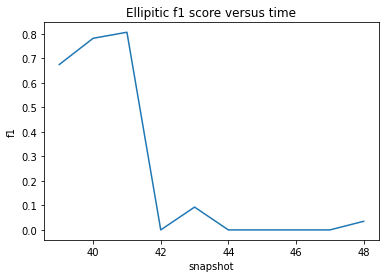

In [36]:
rate=[]
T=[]
with open("./out") as f:
    for line in  f.readlines():
        if(line[0]=='T'):
            T.append(int(line.split()[-1]))
            rate.append(1)
        else:
            rate[-1]=float(line)
import matplotlib.pyplot as plt
plt.plot(T[34:],rate[34:])
plt.ylabel("f1")
plt.xlabel("snapshot")
plt.title("Ellipitic f1 score versus time")
plt.savefig("simple_recompute.png")